# EN2550 - Assignment 01
### Index : 190285J 
### Name : Prabhashwara Kahawalage
### Github : <a href="https://github.com/r3ki3g/Image-processing-fundamentals" target="_blank">Image-processing-fundamentals-work</a>
### This notebook : <a href="https://github.com/r3ki3g/Image-processing-fundamentals/blob/main/assignment-1/Image%20processing%20-%20%20Assignment%2001%20-%20190285J%20-%20Prabhashwara%20Kahawalage.ipynb" target="_blank">Assignment 01</a>

In [1]:
import numpy as np;import matplotlib.pyplot as plt;import cv2 as cv;import pprint
base = r"D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/Image-processing-fundamentals/assignment-1/";

# Q1

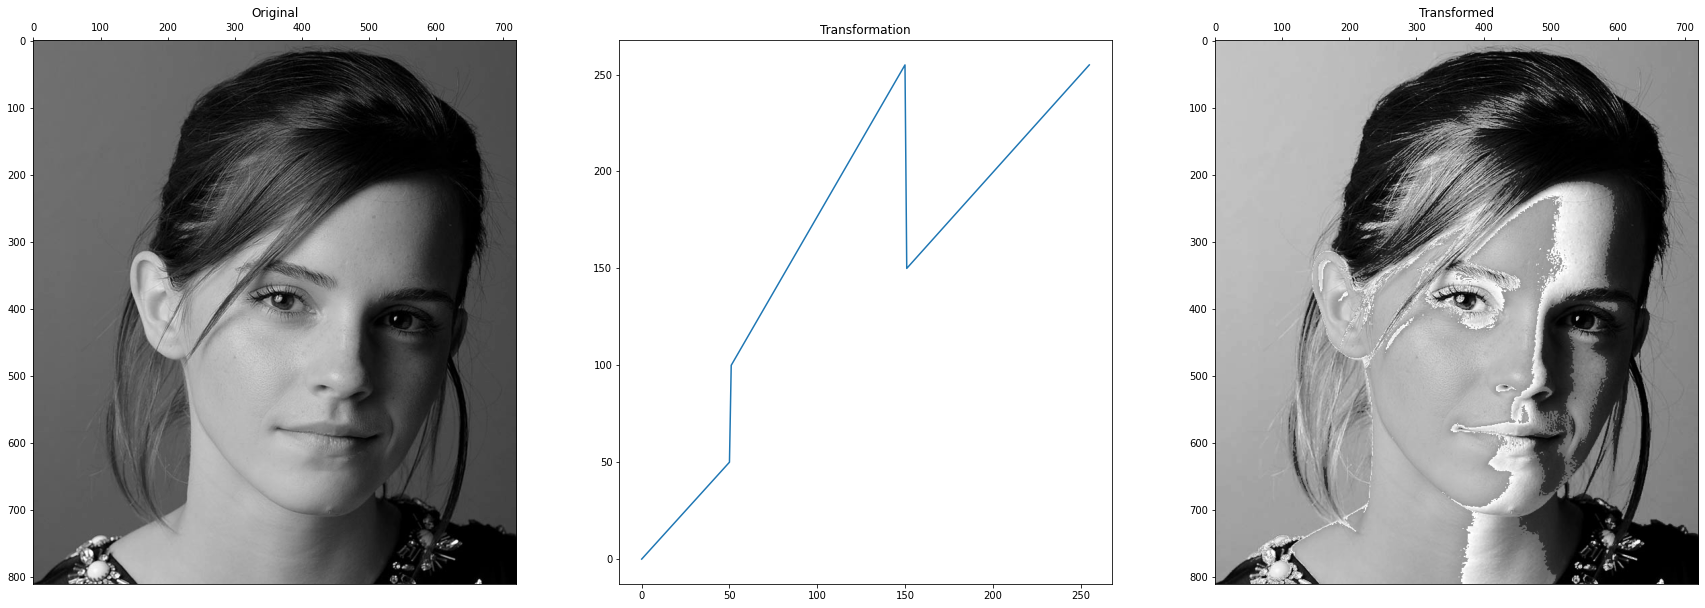

In [2]:
img = cv.imread(base + "emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None;

fig,ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0),ax[0].set_title("Original"),ax[0].xaxis.tick_top();

#making the transformation
t1 = np.linspace(0,50,51);
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)

t = np.concatenate((t1,t2,t3),axis=0)
#print(t.shape)
ax[1].plot(t)
ax[1].set_title("Transformation")
transformed_img = cv.LUT(img,t);
ax[2].imshow(transformed_img,cmap="gray",vmax=255,vmin=0),ax[2].set_title("Transformed"),ax[2].xaxis.tick_top();


<font color="#ff0000">The brightest parts of the face are mapped to averagely bright intensities. Therefore left side of the face with direct lighing is darker than sheltered area (rightside of the face).</font>

# Q2 part (a) and (b)

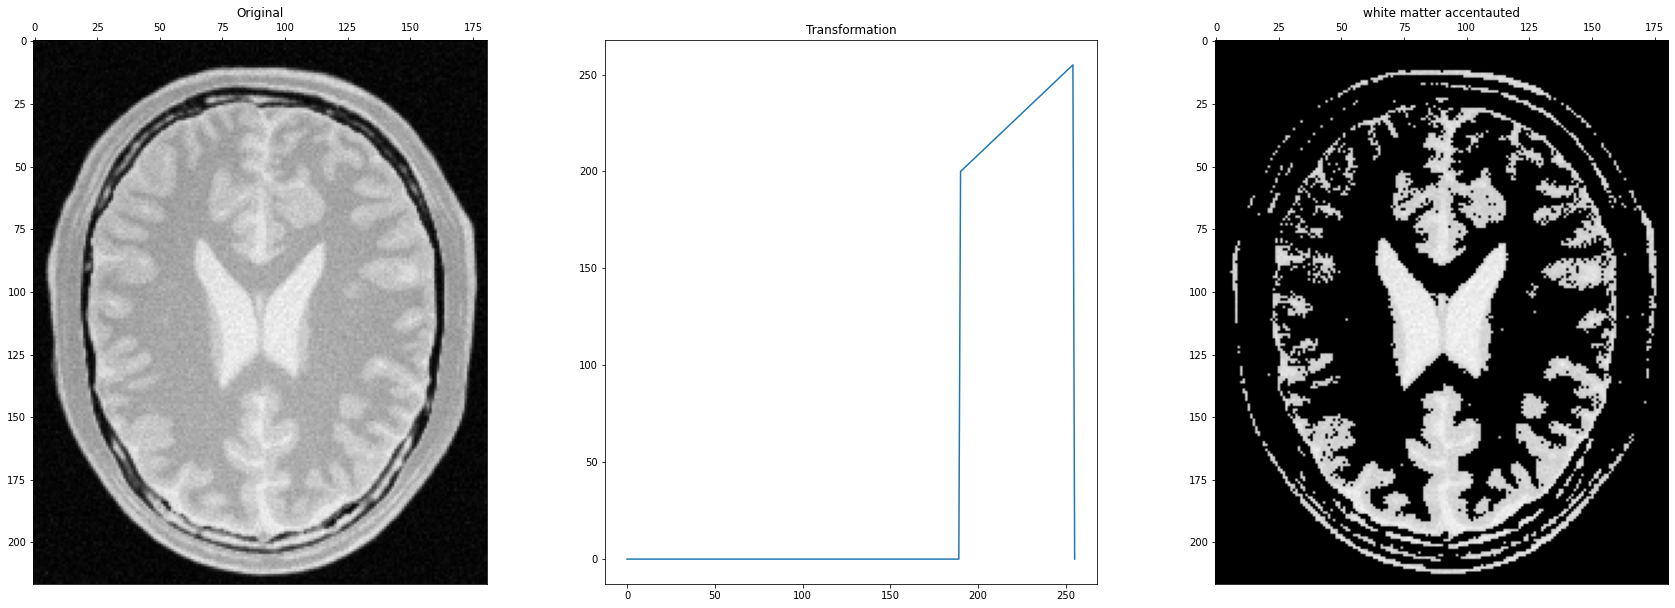

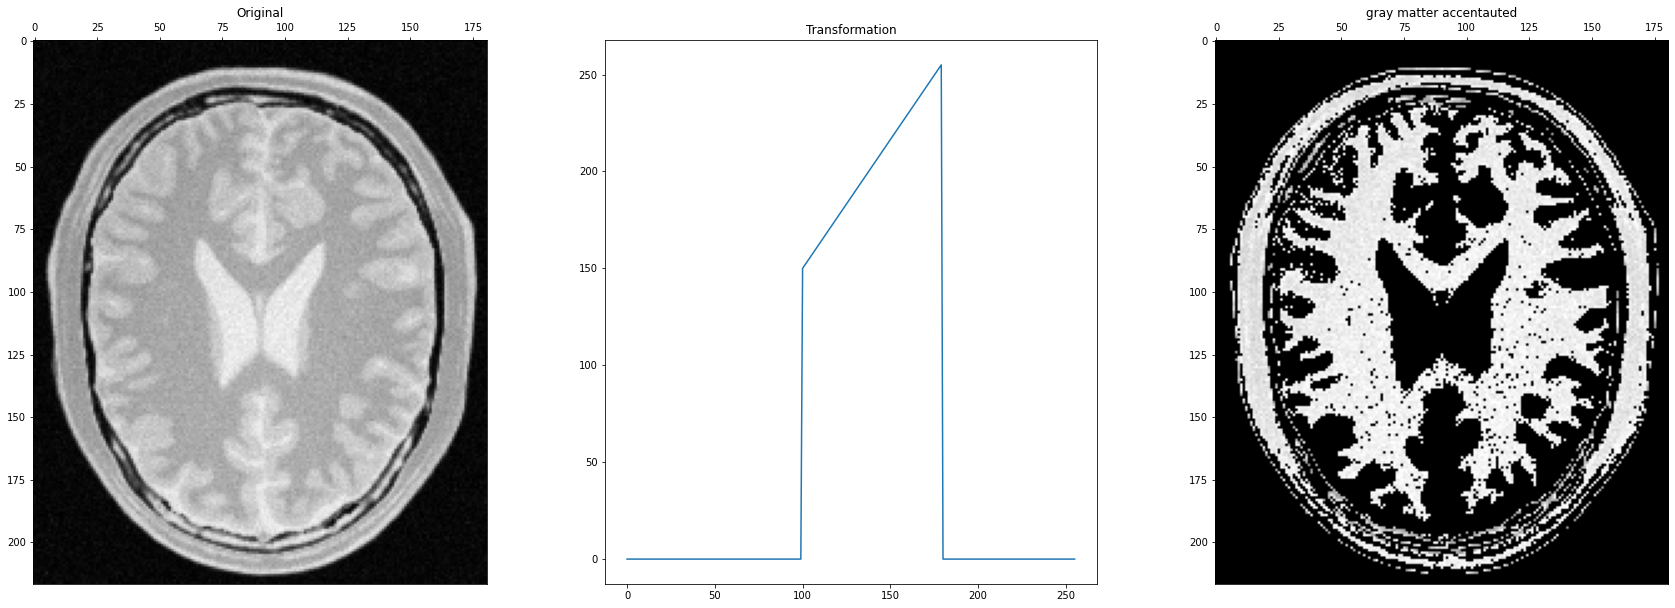

In [4]:
img = cv.imread(base + "brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert img is not None;

fig,ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[0].xaxis.tick_top();

#making the transformation
#Lets implement a window with variable starting point and width
i0 = 190
i1=255
w = i1-i0
t1 = np.linspace(0,0,i0)
t2 = np.linspace(200,255,w);
t3 = np.linspace(0,0,256-i0-w)

t = np.concatenate((t1,t2,t3),axis=0)
#print(t.shape)

ax[1].plot(t),ax[1].set_title("Transformation")

transformed_img = cv.LUT(img,t);

ax[2].imshow(transformed_img,cmap="gray",vmax=255,vmin=0),ax[2].set_title("white matter accentauted"),ax[2].xaxis.tick_top();

fig,ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0),ax[0].set_title("Original"),ax[0].xaxis.tick_top();

#making the transformation
#Lets implement a window with variable starting point and width
i0 = 100
i1 = 180
w = i1-i0
t1 = np.linspace(0,0,i0)
t2 = np.linspace(150,255,w);
t3 = np.linspace(0,0,256-i0-w)

t = np.concatenate((t1,t2,t3),axis=0)
#print(t.shape)

ax[1].plot(t),ax[1].set_title("Transformation")

transformed_img = cv.LUT(img,t);

ax[2].imshow(transformed_img,cmap="gray",vmax=255,vmin=0),ax[2].set_title("gray matter accentauted")
ax[2].xaxis.tick_top();



<font color="#ff0000">With these transforms we can select only the interested intensity window. With the gradient we can compare the intensity variation as well.</font>

# Q3 (a)

using the gamma value: 0.6


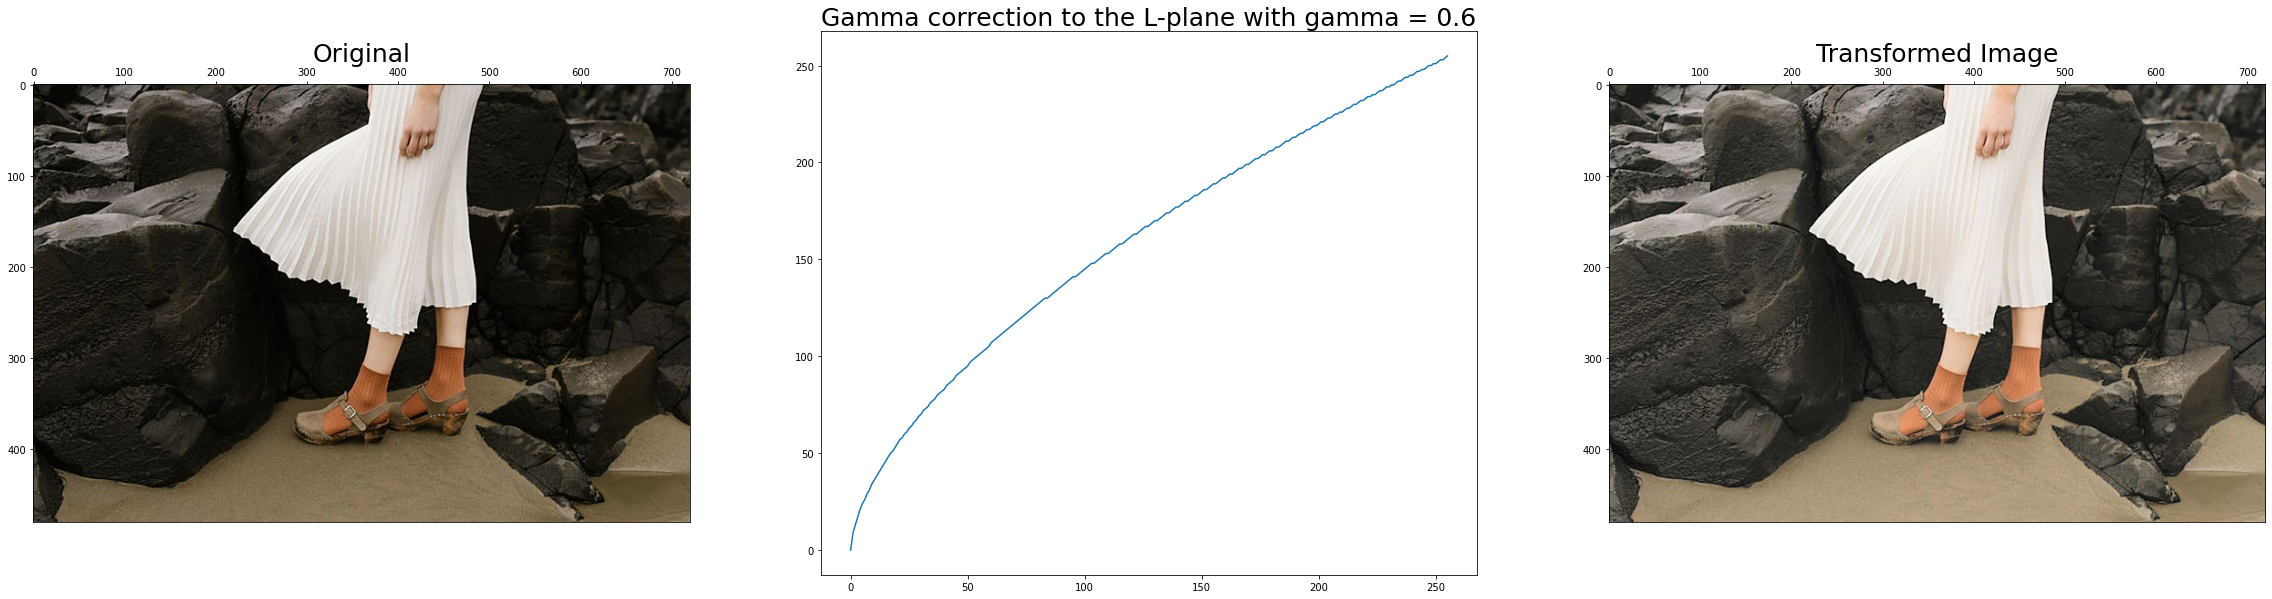

In [4]:
img = cv.imread(base + "highlights_and_shadows.jpg",cv.IMREAD_COLOR)
assert img is not None;
img_RGB = cv.cvtColor(img,cv.COLOR_BGR2RGB);
img_LAB = cv.cvtColor(img,cv.COLOR_BGR2LAB)
L,A,B = cv.split(img_LAB)

gamma = 0.6;
t = np.array([255*(i/255)**gamma for i in range(0,256)]).astype(np.uint8);
L_transformed = cv.LUT(L,t)

transformed_img_LAB = cv.merge((L_transformed,A,B))
transformed_img_RGB = cv.cvtColor(transformed_img_LAB,cv.COLOR_LAB2RGB)


print("using the gamma value:",gamma)

fig,ax = plt.subplots(1,3,figsize=(40,10))
ax[0].imshow(img_RGB),ax[0].set_title("Original",fontsize=25),ax[0].xaxis.tick_top();
ax[1].plot(t),ax[1].set_title("Gamma correction to the L-plane with gamma = " + str(gamma),fontsize=25)
ax[2].imshow(transformed_img_RGB),ax[2].set_title("Transformed Image",fontsize=25),ax[2].xaxis.tick_top();


<font color="#ff0000">The results looks like the darker range of intensities given a wide intensity window, so the details in dark areas are more visible now.</font>

# Q3 (b)

Showing the histograms for original and transformed images (after converting both to grayscale)


([<matplotlib.lines.Line2D at 0x26b4046d070>],
 Text(0.5, 1.0, 'Transformed image - Histogram'))

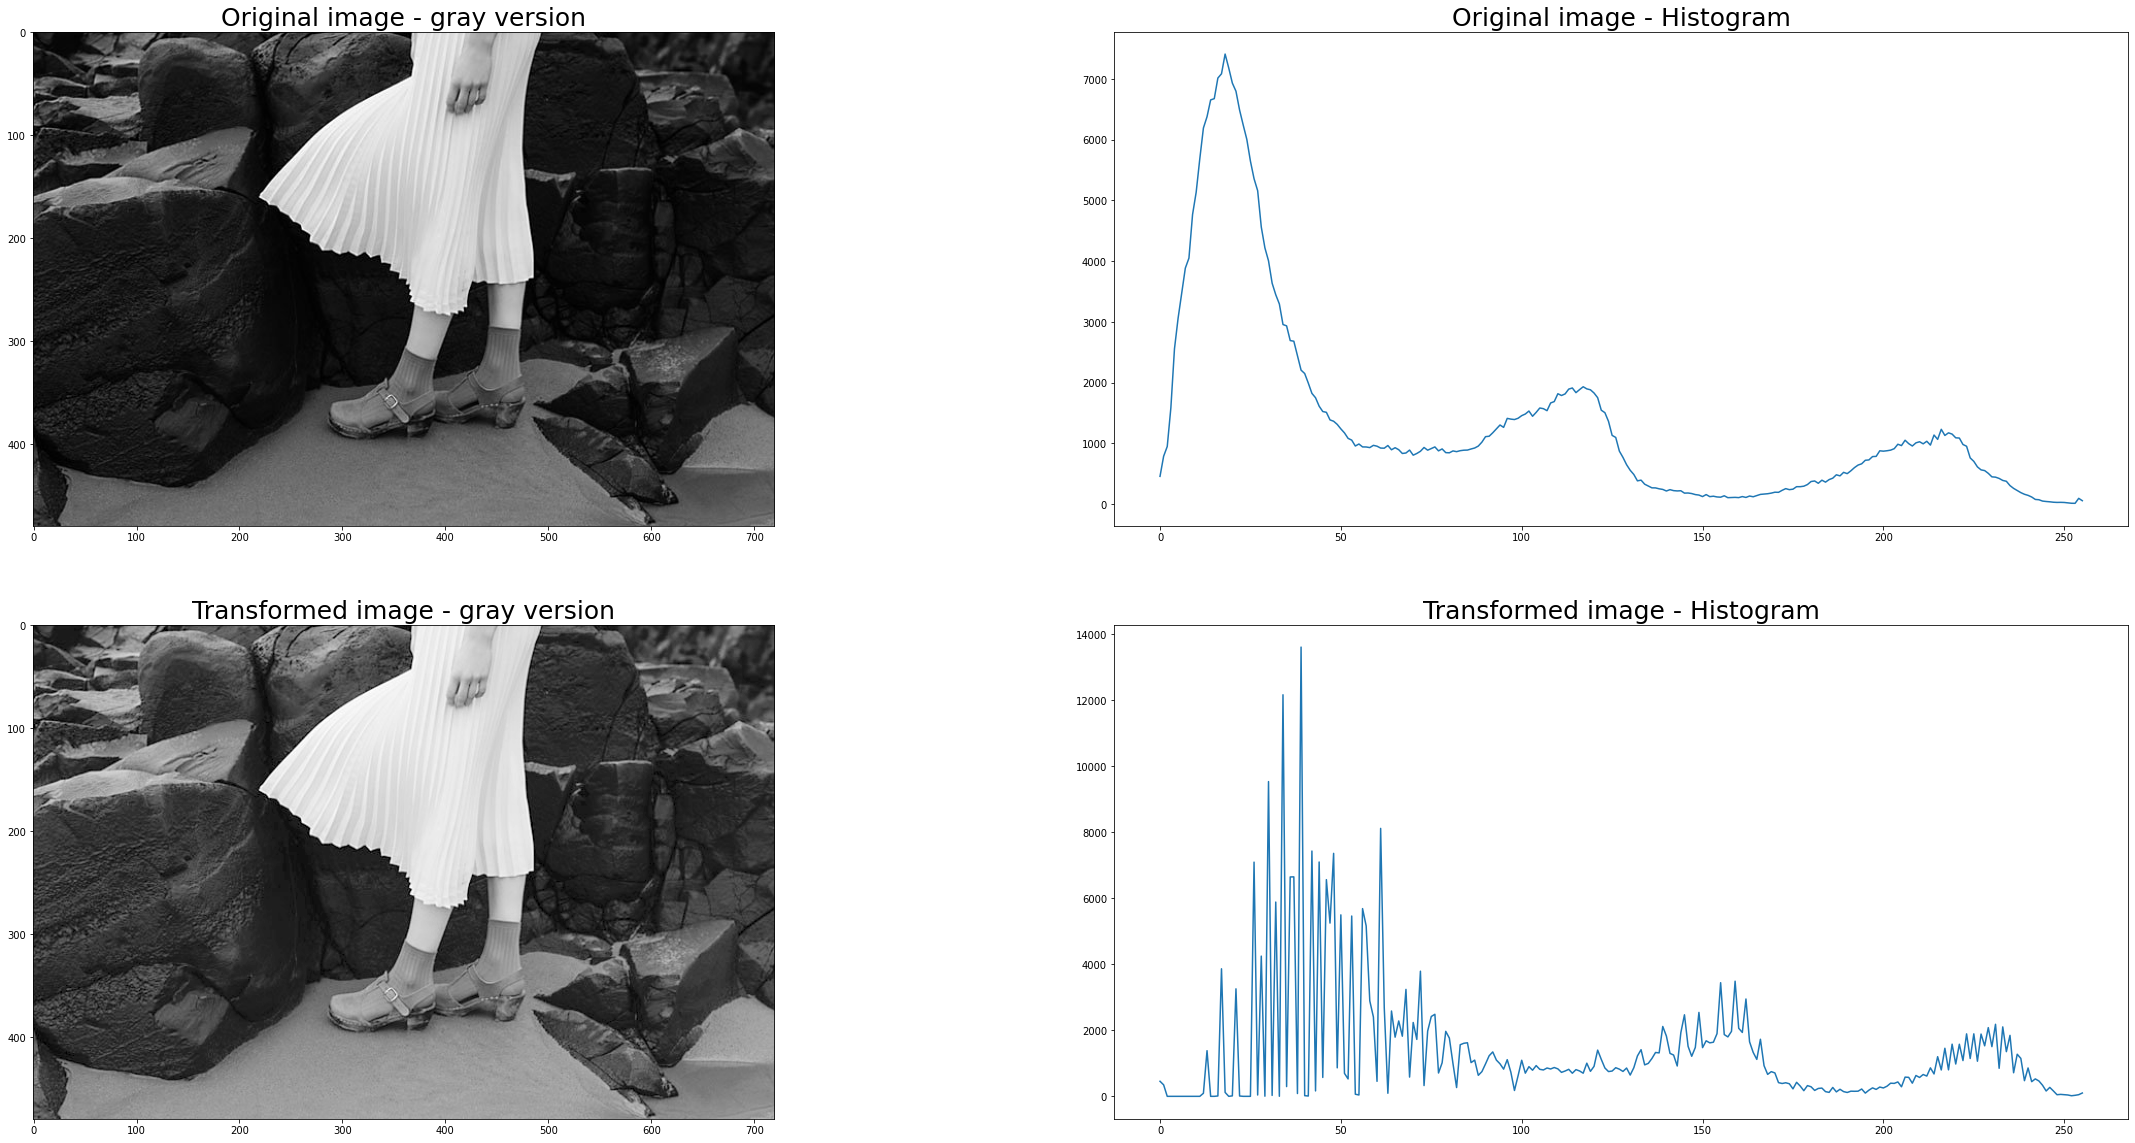

In [5]:
#Histograms
print("Showing the histograms for original and transformed images (after converting both to grayscale)")
gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray_img_transformed = cv.cvtColor(transformed_img_RGB,cv.COLOR_RGB2GRAY)

gray_img_hist = cv.calcHist([gray_img],[0],None,[256],[0,256]);
gray_img_transformed_hist = cv.calcHist([gray_img_transformed],[0],None,[256],[0,256]);

fig,ax = plt.subplots(2,2,figsize=(40,20))
ax[0,0].imshow(gray_img,cmap="gray",vmax=255,vmin=0),ax[0,0].set_title("Original image - gray version",fontsize=25)
ax[0,1].plot(gray_img_hist),ax[0,1].set_title("Original image - Histogram",fontsize=25)
ax[1,0].imshow(gray_img_transformed,cmap="gray",vmax=255,vmin=0),ax[1,0].set_title("Transformed image - gray version",fontsize=25)
ax[1,1].plot(gray_img_transformed_hist),ax[1,1].set_title("Transformed image - Histogram",fontsize=25)


<font color="#ff0000">The darker range is expanded. (As explained earlier)</font>

# Q4

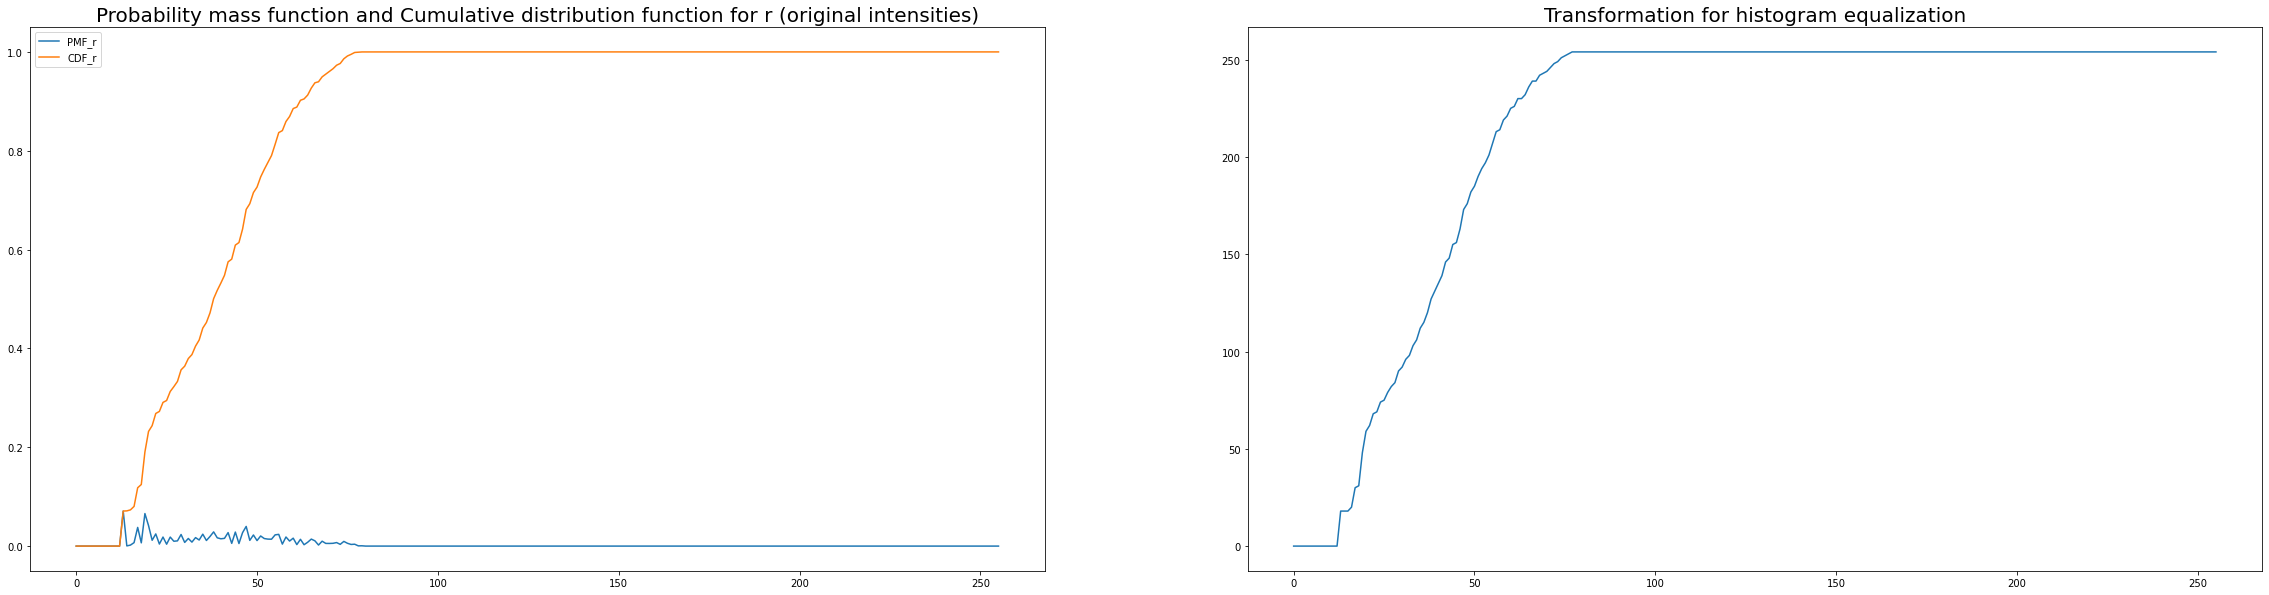

In [6]:
img = cv.imread(base + "shells.png",cv.IMREAD_GRAYSCALE)
assert img is not None;

hist_original = cv.calcHist([img],[0],None,[256],[0,256]);
total_pixels = img.shape[0] * img.shape[1];
P_r = hist_original.astype(np.float32) / total_pixels;

fig,ax = plt.subplots(1,2,figsize=(40,10));
ax[0].plot(P_r,label="PMF_r");
#calculating the CDF_r
CDF_r = np.zeros(P_r.shape[0],dtype=np.float32)
for r in range(P_r.shape[0]):
    if r:
        CDF_r[r] = CDF_r[r-1] + P_r[r];
    else:
        CDF_r[r] = P_r[r];
ax[0].plot(CDF_r,label="CDF_r"),ax[0].legend();
ax[0].set_title("Probability mass function and Cumulative distribution function for r (original intensities)",
               fontsize=20)

#generating the transformation to equalize the histogram
L =256
t = np.array(CDF_r * (L-1)).astype(np.uint8)
ax[1].plot(t),ax[1].set_title("Transformation for histogram equalization",fontsize=20)
plt.show();


<font color="#ff0000">Using the Cumulative distribution function scaled by (L-1) as the transformation.</font>

([<matplotlib.lines.Line2D at 0x26b405463d0>],
 Text(0.5, 1.0, 'Histogram of histogram equalized image'))

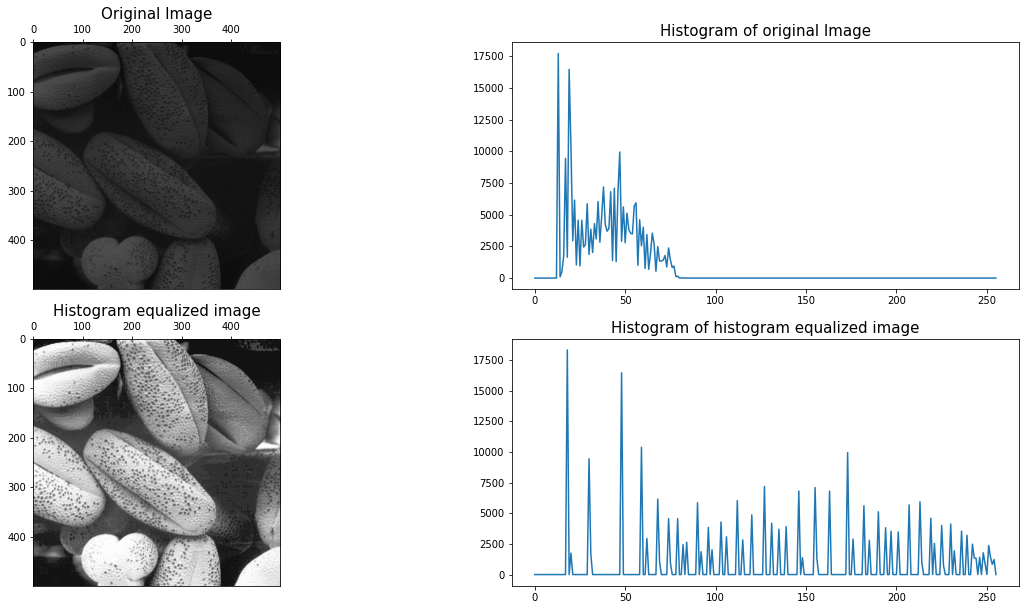

In [7]:
hist_EQ_img = cv.LUT(img,t)
histOf_hist_EQ_img = cv.calcHist([hist_EQ_img],[0],None,[256],[0,256])

fig, ax = plt.subplots(2,2,figsize=(20,10))

ax[0,0].imshow(img,cmap = "gray",vmax=255,vmin=0),ax[0,0].set_title("Original Image",fontsize=15)
ax[0,0].xaxis.tick_top()
ax[0,1].plot(hist_original),ax[0,1].set_title("Histogram of original Image",fontsize=15)
ax[1,0].imshow(hist_EQ_img,cmap = "gray",vmax=255,vmin=0),ax[1,0].set_title("Histogram equalized image",fontsize=15)
ax[1,0].xaxis.tick_top()
ax[1,1].plot(histOf_hist_EQ_img),ax[1,1].set_title("Histogram of histogram equalized image",fontsize=15)


<font color="#ff0000">Now histogram is equalized so the full range is in used to show details.The ripples in the final histogram is a result of discrete intensity values we are using instead of continuous.</font>

# Q5 (a) and (b)
Nearest neightbor - zooming -  function : zoomNN_color(src,scalar)<br/>
Bipolar interpolation - zooming - function: zoomBI_color(src,scalar)

(<matplotlib.image.AxesImage at 0x26b403704f0>,
 None,
 Text(0.5, 1.0, 'x4 zoomed - bilinear interpolation'))

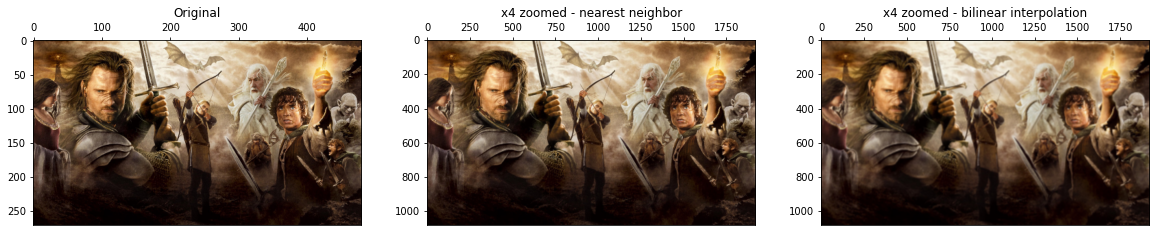

In [8]:
img = cv.imread("D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/Image-processing-fundamentals/assignment-1/a1q5images/im01small.png",cv.IMREAD_COLOR)
assert img is not None
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

def zoomNN_singlePlane(src,scalar):
    h0 = src.shape[0]
    w0 = src.shape[1]
    h1 = int(h0 * scalar)
    w1 = int(w0 * scalar)
    zoomedImg = np.zeros((h1,w1),dtype=np.uint8)
    for y in range(h1):
        for x in range(w1):
            y0 = int(min(y // scalar + int(y%scalar >= 0.5),
                     src.shape[0]-1));
            x0 = int(min(x // scalar + int(x%scalar >= 0.5),
                     src.shape[1]-1));
            zoomedImg[y,x] = src[y0,x0]
    return zoomedImg


def zoomBI_singlePlane(src,scalar):
    h0 = src.shape[0]
    w0 = src.shape[1]
    h1 = int(h0 * scalar)
    w1 = int(w0 * scalar)
    zoomedImg = np.zeros((h1,w1),dtype=np.uint8)
    for y in range(h1):
        for x in range(w1):
            #floats
            y0 = (y / scalar);
            x0 = (x / scalar);
            y_frac = y0 %1
            x_frac = x0 %1
            
            
            y00 = int(y0)
            x00 = int(x0)
            y01 = min(h0-1,y00+1)
            x01 = min(w0-1,x00+1)
            
            intensity_x_0 = src[y00,x00]*y_frac + src[y01,x00]*(1-y_frac)
            intensity_x_1 = src[y00,x01]*y_frac + src[y01,x01]*(1-y_frac)
            
            intensity = intensity_x_0 * x_frac  + intensity_x_1 * (1-x_frac)
            intensity = int(intensity)
            
            zoomedImg[y,x] = intensity
    return zoomedImg 

def zoomNN_color(src,scalar):
    p1,p2,p3 = cv.split(src);
    return cv.merge((zoomNN_singlePlane(p1,scalar),zoomNN_singlePlane(p2,scalar),zoomNN_singlePlane(p3,scalar)))
def zoomBI_color(src,scalar):
    p1,p2,p3 = cv.split(src);
    return cv.merge((zoomBI_singlePlane(p1,scalar),zoomBI_singlePlane(p2,scalar),zoomBI_singlePlane(p3,scalar))) 
zoomedImgNN = zoomNN_color(img,4);
zoomedImgBI = zoomBI_color(img,4);
#visualize the result
fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0),ax[0].xaxis.tick_top(),ax[0].set_title("Original")
ax[1].imshow(zoomedImgNN,vmax=255,vmin=0),ax[1].xaxis.tick_top(),ax[1].set_title("x4 zoomed - nearest neighbor")
ax[2].imshow(zoomedImgBI,vmax=255,vmin=0),ax[2].xaxis.tick_top(),ax[2].set_title("x4 zoomed - bilinear interpolation")


In [9]:
smallImages = ["im01small.png","im02small.png","im03.png"];
zoomedImages = ["im01.png","im02.png","im03.png"];
print("Nearest neighbor")
for i in range(2):
    imgS = cv.imread("D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/Image-processing-fundamentals/assignment-1/a1q5images/"+smallImages[i] ,cv.IMREAD_COLOR)
    imgZ = cv.imread("D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/Image-processing-fundamentals/assignment-1/a1q5images/"+zoomedImages[i] ,cv.IMREAD_COLOR)
    zoomed = zoomNN_color(imgS,4)
    SSD = np.sum((zoomed - imgZ)**2)/(imgZ.shape[0]*imgZ.shape[1]*imgZ.shape[2])
    print("image:", i," --> Normalized sum of error squared : ",SSD)
    
print("Bilinear interpolation")
for i in range(2):
    imgS = cv.imread("D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/Image-processing-fundamentals/assignment-1/a1q5images/"+smallImages[i] ,cv.IMREAD_COLOR)
    imgZ = cv.imread("D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/Image-processing-fundamentals/assignment-1/a1q5images/"+zoomedImages[i] ,cv.IMREAD_COLOR)
    zoomed = zoomBI_color(imgS,4)
    SSD = np.sum((zoomed - imgZ)**2)/(imgZ.shape[0]*imgZ.shape[1]*imgZ.shape[2])
    print("image:", i," --> Normalized sum of error squared : ",SSD)


Nearest neighbor
image: 0  --> Normalized sum of error squared :  52.55124839248971
image: 1  --> Normalized sum of error squared :  23.602486545138888
Bilinear interpolation
image: 0  --> Normalized sum of error squared :  50.66079282407407
image: 1  --> Normalized sum of error squared :  22.207302806712963


# Q6 (a)

(<matplotlib.image.AxesImage at 0x26b43146d30>,
 Text(0.5, 1.0, 'Gradient-X of the image'))

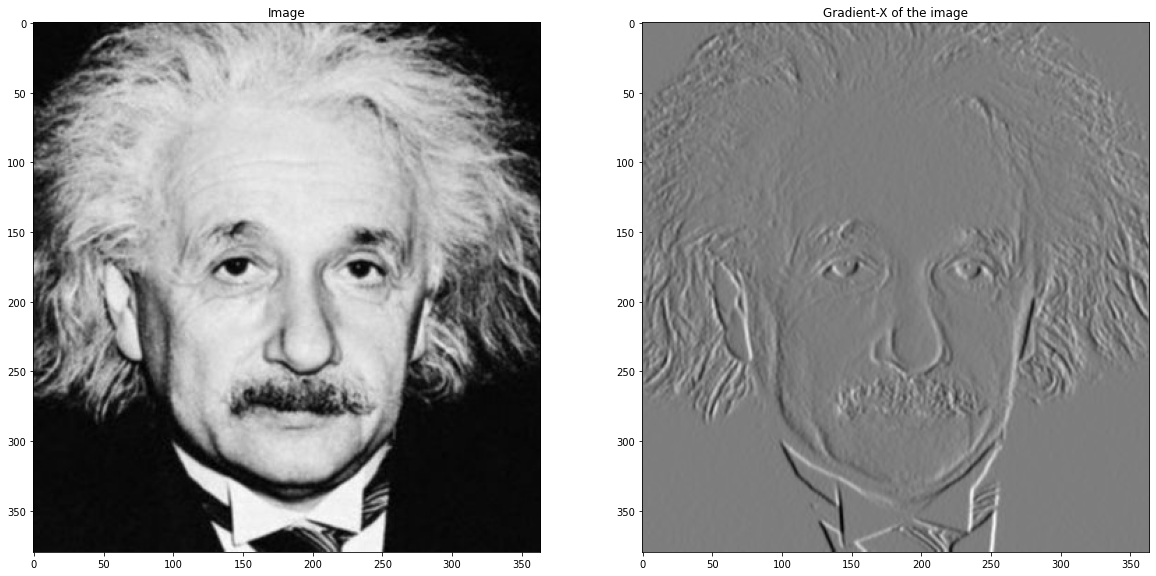

In [10]:
img = cv.imread(base  + "einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32);
assert img is not None;

sobel_h = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]]).astype(np.float32);
img_gradX = cv.filter2D(img,-1,sobel_h)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0),ax[0].set_title("Image")
ax[1].imshow(img_gradX,cmap="gray"),ax[1].set_title("Gradient-X of the image")


<font color="#ff0000">Vertical edges are resulted in higher values (as the given filter be the Sobel horizontal.)</font>

# Q6 (b)

(<matplotlib.image.AxesImage at 0x26b4393cb50>,
 Text(0.5, 1.0, 'My own function generated Gradient-X of the image'))

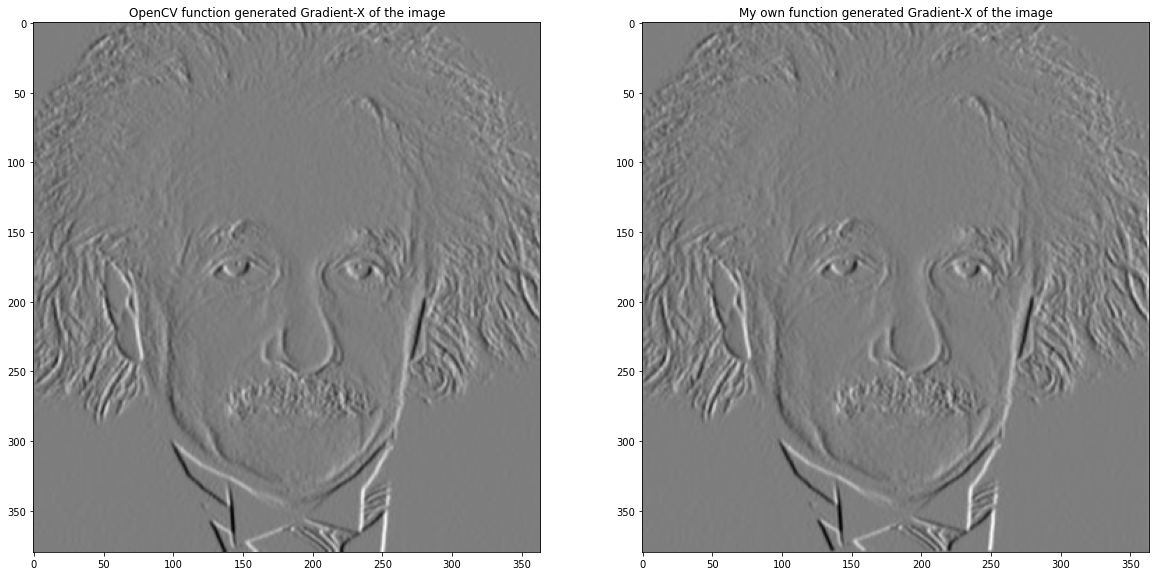

In [11]:
#own code for sobel filtering
res = np.zeros(img.shape,dtype=np.float32)
for y in range(res.shape[0]):
    for x in range(res.shape[1]):
        pixel_mul_kernel_val_sum = 0;
        for k1 in range(3):
            for k2 in range(3):
                kernel_val = sobel_h[k1,k2]
                
                #required pixel in the src image <-- correlattion
                posY = y + k1
                posX = x + k2
                
                #equalent  zero padding
                if (0<=posY<img.shape[0] and 0<=posX<img.shape[1]):
                    pixel_val = img[posY,posX]
                    pixel_mul_kernel_val_sum += kernel_val * pixel_val;
        res[y,x] = pixel_mul_kernel_val_sum
        

                
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img_gradX,cmap="gray"),ax[0].set_title("OpenCV function generated Gradient-X of the image")
ax[1].imshow(res,cmap="gray"),ax[1].set_title("My own function generated Gradient-X of the image")

             

<font color="#ff0000">Both outputs looks the same!</font>

# Q6 (c)

(<matplotlib.image.AxesImage at 0x26b43559490>,
 Text(0.5, 1.0, 'Filtered image by two seperated 1D  filters'))

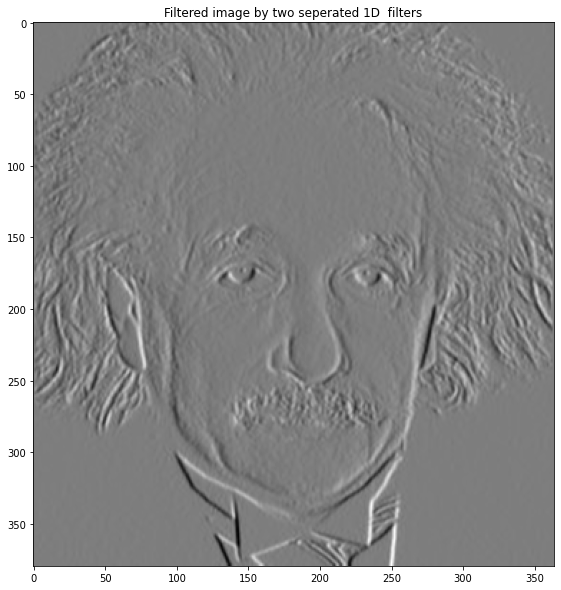

In [12]:
#Filter is seperable --> using the seperability improves performance

kernel_1D_vertical = np.array([1,2,1],dtype=np.float32);
kernel_1D_horizontal = np.array([1,0,-1],dtype=np.float32);

filteredImg  =  cv.sepFilter2D(img,-1,kernel_1D_horizontal,kernel_1D_vertical)
fig, ax = plt.subplots(1,figsize=(10,10))
ax.imshow(filteredImg,cmap="gray"),ax.set_title("Filtered image by two seperated 1D  filters")


<font color="#ff0000">This output is also same as previous.But with the added advantage of less computational complexity.</font>

# Q7 (a)

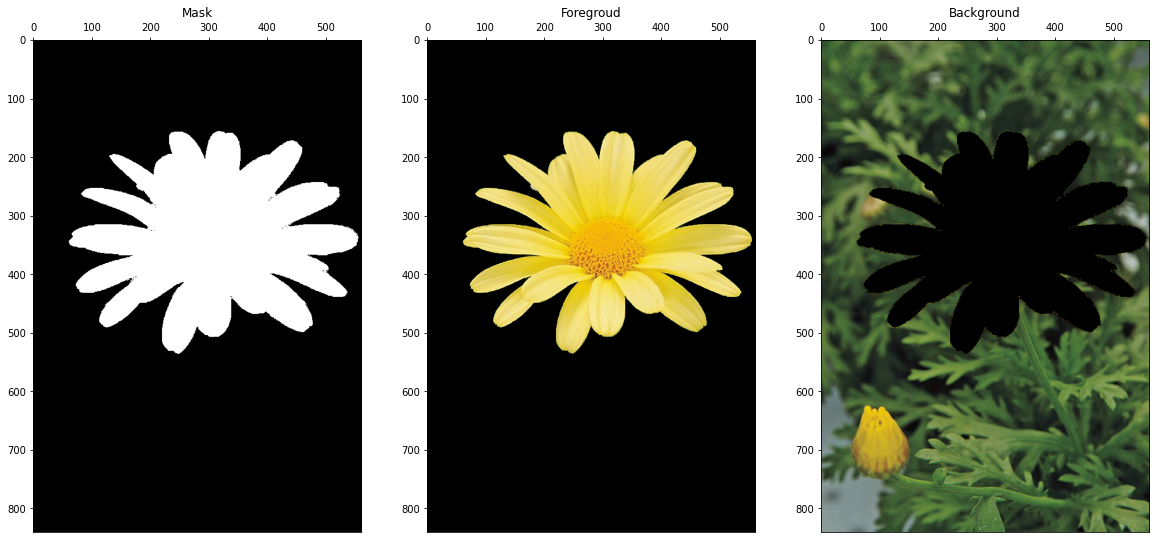

In [13]:
img = cv.imread(base + "daisy.jpg")
img =  cv.cvtColor(img,cv.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (60,100,500,500)

cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2 = img*mask2[:,:,np.newaxis]
backgroundMask = (mask2==0).astype(np.int8);
img3 = img*backgroundMask[:,:,np.newaxis]
fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(mask2,cmap= "gray"),ax[0].xaxis.tick_top(),ax[0].set_title("Mask")
ax[1].imshow(img2,cmap= "gray"),ax[1].xaxis.tick_top(),ax[1].set_title("Foregroud")
ax[2].imshow(img3,cmap= "gray"),ax[2].xaxis.tick_top(),ax[2].set_title("Background")
plt.show()


# Q7 (b)

(<matplotlib.image.AxesImage at 0x26b3fd01e80>,
 None,
 Text(0.5, 1.0, 'Background blured'))

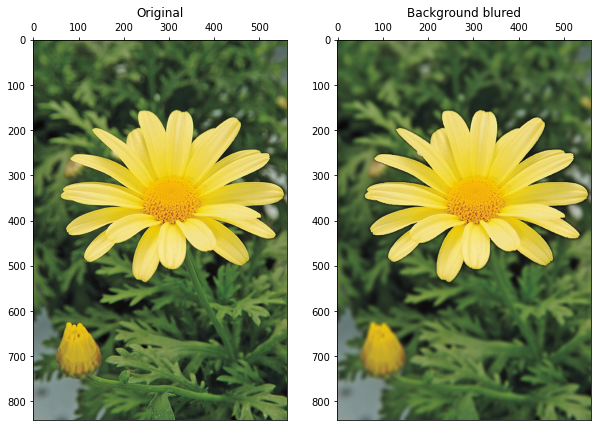

In [15]:
bluredBG = cv.GaussianBlur(img3,(9,9),9)
finalOutput = bluredBG*backgroundMask[:,:,np.newaxis] + img2

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img,cmap= "gray"),ax[0].xaxis.tick_top(),ax[0].set_title("Original")
ax[1].imshow(finalOutput,cmap= "gray"),ax[1].xaxis.tick_top(),ax[1].set_title("Background blured")


# Q7 (c)
When we blur the background some black pixels got mixed as the area belongs to the flower was replaced by black pixels.